# Análise Exploratória

O objetivo deste documento é apresentar soluções para as seguintes perguntas: <br>
a. Qual o melhor estado cadastrado na base de dados para se vender um
carro de marca popular e por quê? <br>
b. Qual o melhor estado para se comprar uma picape com transmissão
automática e por quê? <br>
c. Qual o melhor estado para se comprar carros que ainda estejam dentro
da garantia de fábrica e por quê? <br>
d. Qual o melhor estado para se comprar carros blidados e por quê? <br>
e. Qual o melhor estado para comprar carro de um único dono que o mesmo aceite trocas e  por quê? <br>
f. Quais estados venderam os 10 carros mais caros?

In [8]:
import pandas as pd
df = pd.read_csv('./cars_train.csv', encoding='utf-16', sep='\t')
import matplotlib.pyplot as plt
def plotGraphs(data, xlabel_, title, ylabel_: str='Quantidade'):
    fig, ax = plt.subplots()
    ax.bar(data.index, data.values)
    ax.set_xlabel(xlabel_)
    ax.set_ylabel(ylabel_)
    ax.set_title(title)
    ax.set_xticks(range(len(data.index)))
    ax.set_xticklabels(data.index, rotation=90)
    plt.show()


### Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

Para responder a essa pergunta, pode-se analisar a relação entre os preços e a quantidade de carros vendidos em cada estado. É possível filtrar a quantidade de carros populares vendidos em cada estado, chamando de carros populares aqueles com preço até 100 mil reais.

In [2]:
question_a = df[df['preco'] < 100000]

De acordo com a análise dos dados, constatou-se que São Paulo é o estado mais favorável para a venda de carros de marcas populares. Observou-se que a maioria dos carros populares, inclusive aqueles com valores superiores, foi vendida nesse estado.

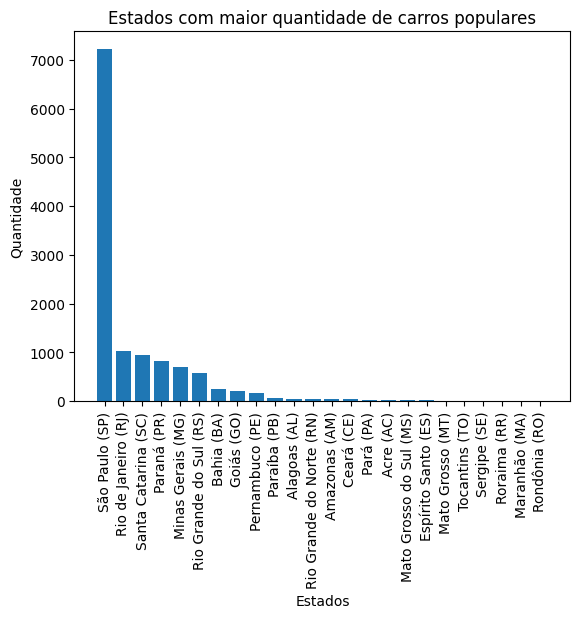

In [9]:
plotGraphs(question_a['estado_vendedor'].value_counts(), 'Estados', 'Estados com maior quantidade de carros populares')

### Qual o melhor estado para se comprar uma picape com transmissão automática e por quê? 

Para responder a essa questão, é feita uma análise do modelo do carro e se ele possui transmissão automática, identificando o estado com a maior quantidade de carros nessa configuração. A conclusão alcançada é que São Paulo é o melhor estado para a compra de carros com essas especificações, devido à sua quantidade significativa.

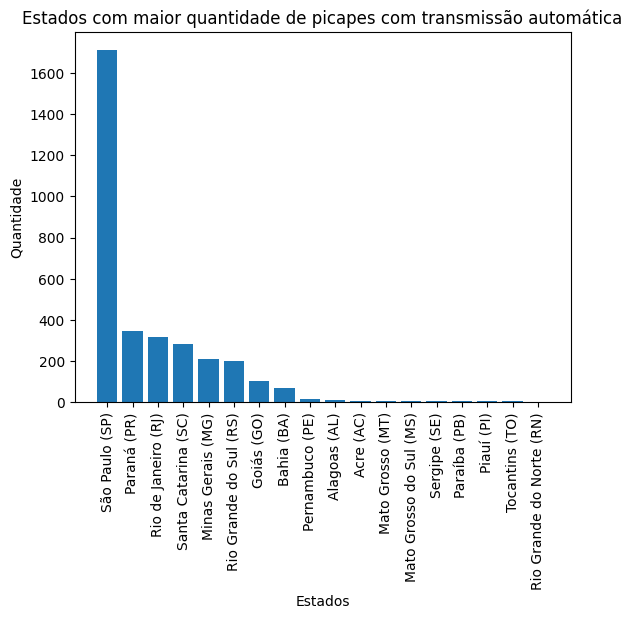

In [11]:
question_b = df[(df['tipo'] == 'Picape') & (df['cambio'] == 'Automática')]
plotGraphs(question_b['estado_vendedor'].value_counts(), 'Estados', 'Estados com maior quantidade de picapes com transmissão automática')

### Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê ?

Para responder a essa questão, é realizada uma análise considerando apenas os carros que possuem as características requeridas. A conclusão obtida é que São Paulo é o melhor estado para a compra de carros com essas configurações, devido à sua quantidade significativa.

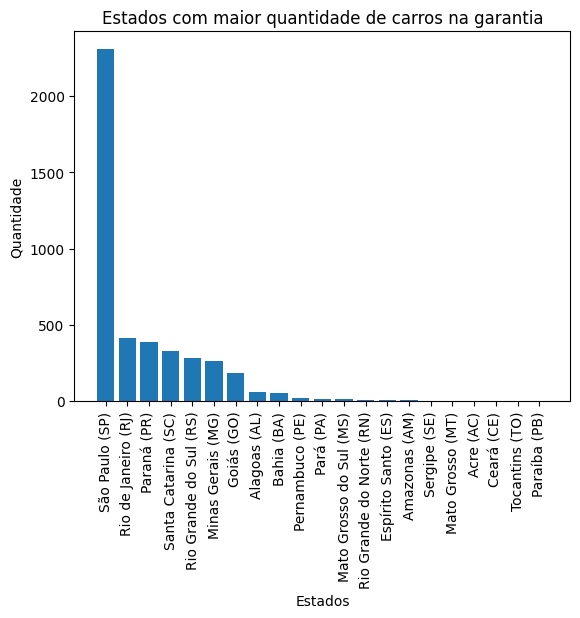

In [13]:
question_c = df[df['garantia_de_fábrica'] ==  'Garantia de fábrica']
plotGraphs(question_c['estado_vendedor'].value_counts(), 'Estados', 'Estados com maior quantidade de carros na garantia')

### Qual o melhor estado para se comprar carros blidados e por quê?

Para responder a essa questão, são analisados apenas os carros que possuem as características requeridas. Observa-se que o único estado na base de dados que possui carros com blindagem é São Paulo, concluindo assim que esse é o melhor estado para a compra de carros nessas especificações.

In [8]:
question_d = df[df['blindado'] ==  'S']
print(question_d['estado_vendedor'].value_counts())

São Paulo (SP)    248
Name: estado_vendedor, dtype: int64


### Qual melhor estado para comprar carro de um único dono que o mesmo aceite trocas e  por quê?

Para responder a essa questão, são analisados apenas os carros que possuem as características requeridas. Observa-se que São Paulo é o estado com o maior número de vendedores que oferecem carros de único dono e aceitam trocas.

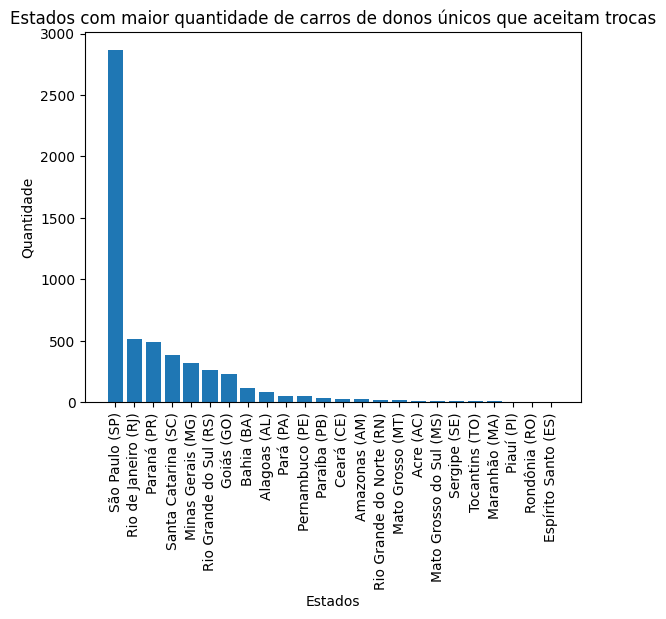

In [15]:
question_e = df[(df['veiculo_único_dono'] == 'Único dono') & (df['dono_aceita_troca'] == 'Aceita troca')]
plotGraphs(question_e['estado_vendedor'].value_counts(), 'Estados', 'Estados com maior quantidade de carros de donos únicos que aceitam trocas')

### Qual estados venderam os 10 carros mais caros?

Para responder a essa questão, é necessário ordenar o conjunto de dados pelos valores dos carros e selecionar os 10 primeiros. Observa-se que São Paulo, Santa Catarina, Goiás e Rio Grande do Sul são os estados que venderam os carros mais caros. Entre esses estados, São Paulo se destaca, sendo responsável por 7 dos 10 carros mais caros vendidos.

In [17]:
question_f = df.sort_values('preco', ascending=False)
question_f = question_f.head(10)

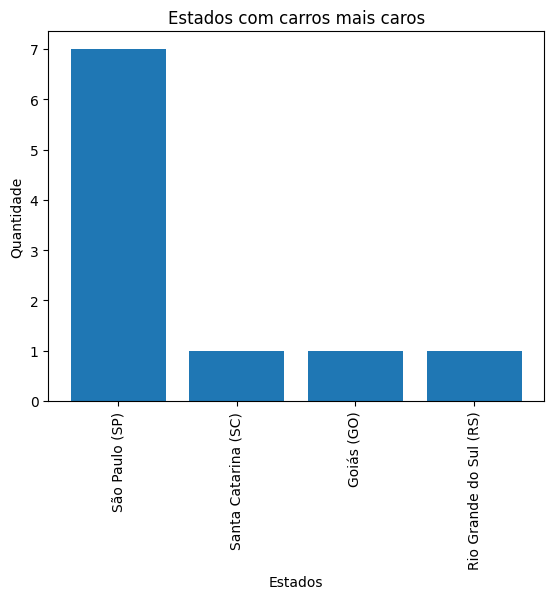

In [18]:
plotGraphs(question_f['estado_vendedor'].value_counts(), 'Estados', 'Estados com carros mais caros')

Com base nas análises anteriores, pode-se concluir que São Paulo se destaca como um importante polo comercial na venda de carros, liderando em todos os cenários analisados.